This Python code is primarily focused on implementing a machine learning pipeline for the IRIS dataset, involving data loading, preprocessing, model training, and evaluation.

Dataset: https://www.kaggle.com/datasets/arshid/iris-flower-dataset

### Libraries
The code begins by importing essential libraries such as Pandas for data manipulation, Matplotlib for visualization, Seaborn for enhancing visualizations, and various modules from scikit-learn (a popular machine learning library) for model selection, preprocessing, SVM, metrics, and different classifiers.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_recall_fscore_support
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Functions
1. **load_dataset(file_path)**: Loads the dataset from a file using pandas read_csv.
2. **preprocess_data(X, y)**: Preprocesses the input features and target variable. It encodes the target variable using LabelEncoder, splits the data into training and testing sets using train_test_split, and performs feature scaling using StandardScaler.
3. **train_and_tune_model(X_train, y_train)**: Trains and tunes the model using Support Vector Machine (SVM) with grid search, where GridSearchCV is used to find the best hyperparameters for the SVM model.
4. **evaluate_classifiers(classifiers, X_test, y_test, label_encoder)**: Evaluates different classifiers by fitting each one, making predictions, calculating accuracy, precision, recall, F1 score, and displaying a classification report and confusion matrix for each classifier.

In [2]:
# Function to load the dataset from a file
def load_dataset(file_path):
    try:
        iris_data = pd.read_csv(file_path)
        return iris_data
    except FileNotFoundError:
        print("File not found. Please provide the correct file path.")
        exit()

In [3]:
# Function to preprocess the data
def preprocess_data(X, y):
    # Encode the target variable
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Split the data into training and testing sets, and perform feature scaling
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test, label_encoder

In [4]:
# Function to train and tune the model using SVM with grid search
def train_and_tune_model(X_train, y_train):
    # Define the parameter grid for grid search
    param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf']}

    # Perform grid search with 5-fold cross-validation
    grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
    grid.fit(X_train, y_train)

    print("Best hyperparameters:", grid.best_params_)
    best_model = grid.best_estimator_
    best_model.fit(X_train, y_train)

    return best_model, grid.best_params_

In [5]:
# Function to evaluate different classifiers
def evaluate_classifiers(classifiers, X_test, y_test, label_encoder):
    for name, clf in classifiers.items():
        # Skip Multinomial Naive Bayes due to non-negative feature requirement
        if name == "Multinomial Naive Bayes":
            print("Skipping Multinomial Naive Bayes due to non-negative feature requirement")
            continue

        # Fit the classifier, make predictions, and calculate evaluation metrics
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro', zero_division=0)

        # Print accuracy and classification report
        print(f"\nClassifier: {name}")
        print(f"Accuracy: {accuracy}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

        # Plot confusion matrix
        conf_mat = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='g', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix - {name}')
        plt.show()

### Main Code
The main code segment loads the dataset, preprocesses the data, trains and tunes the SVM model, defines other classifiers (Logistic Regression, Random Forest, Decision Trees, KNN), and evaluates these classifiers using the previously defined function.

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, 

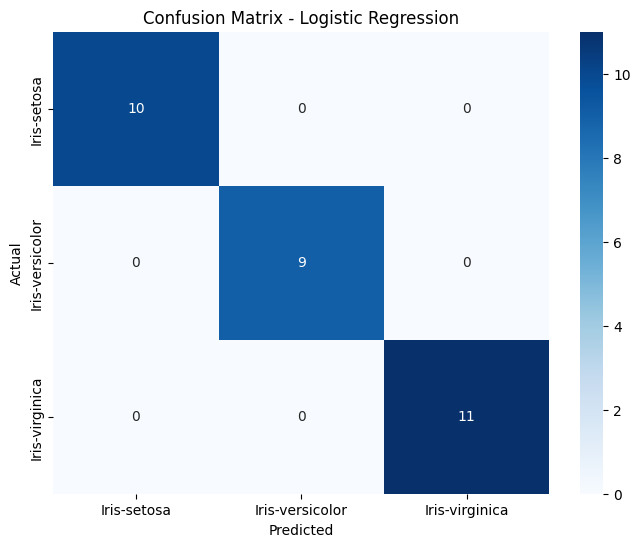


Classifier: Random Forest
Accuracy: 1.0

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



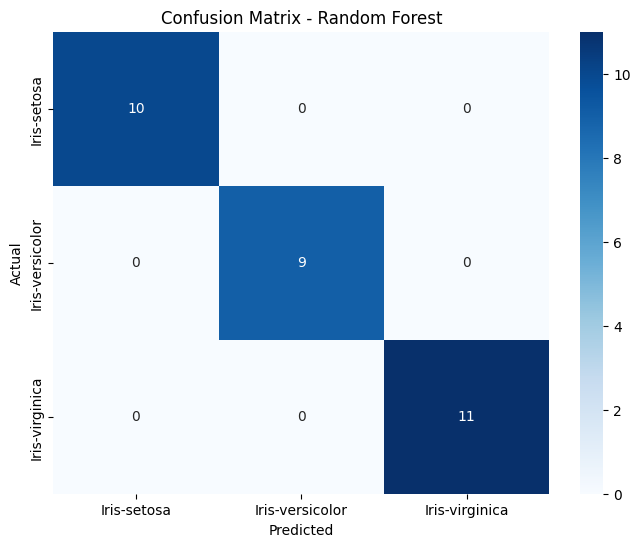


Classifier: Decision Tree (Gini)
Accuracy: 1.0

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



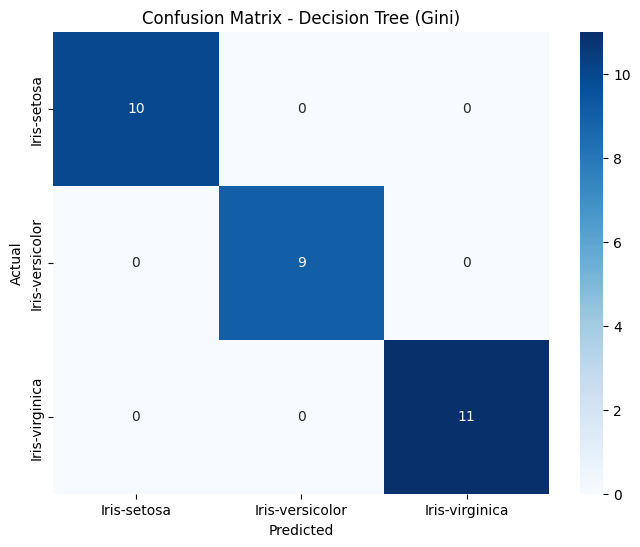


Classifier: Decision Tree (Entropy)
Accuracy: 1.0

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



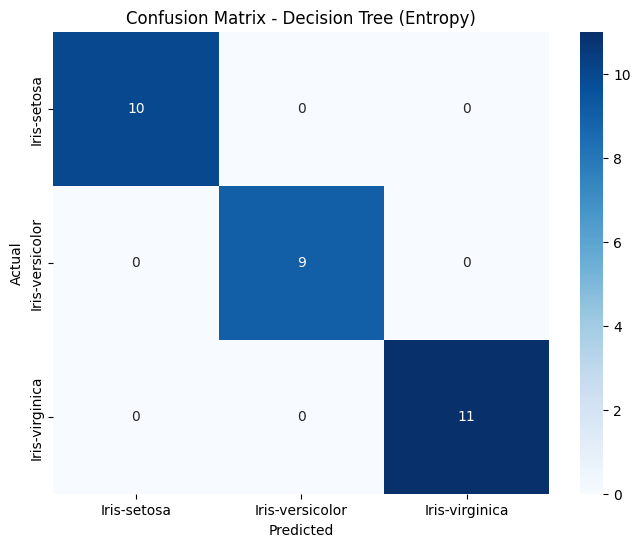


Classifier: KNN
Accuracy: 1.0

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



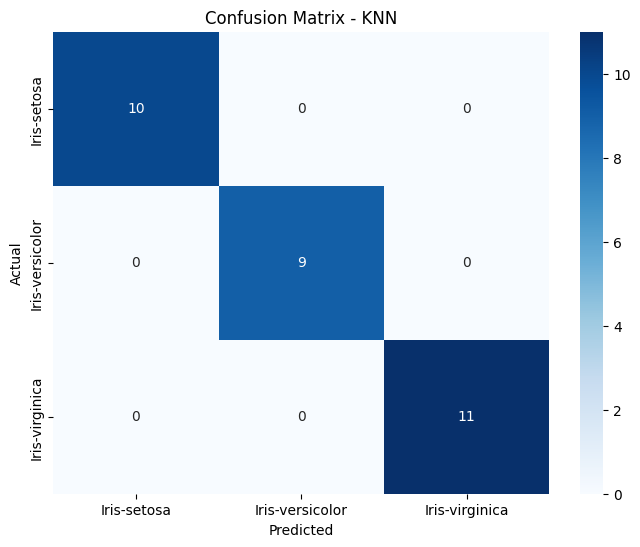


Classifier: Support Vector Machine
Accuracy: 0.9666666666666667

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



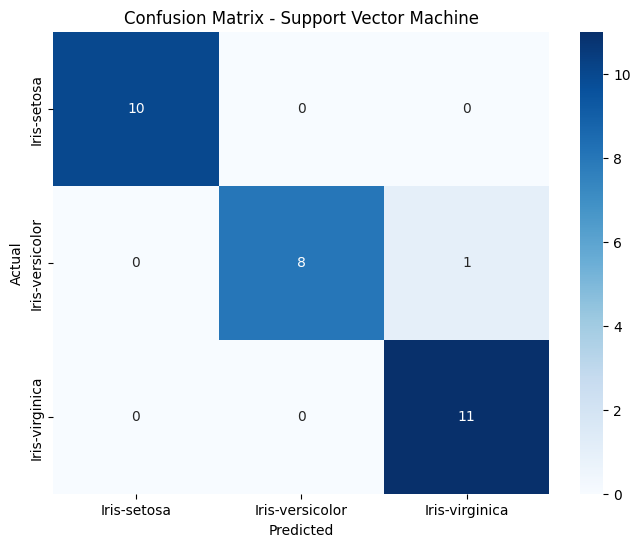

In [6]:
# Main code
file_path = '/content/drive/MyDrive/Colab Notebooks/Neuronexus Innovations/NeuroNexus Innovations - Data Science/Iris Flower Classification/IRIS.csv'
iris_data = load_dataset(file_path)
X = iris_data.drop('species', axis=1)
y = iris_data['species']

# Preprocess the data
X_train, X_test, y_train, y_test, label_encoder = preprocess_data(X, y)

# Train and tune the model using SVM with grid search
best_model, best_params = train_and_tune_model(X_train, y_train)

# Define classifiers for evaluation
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree (Gini)": DecisionTreeClassifier(criterion="gini"),
    "Decision Tree (Entropy)": DecisionTreeClassifier(criterion="entropy"),
    "KNN": KNeighborsClassifier(),
    "Support Vector Machine": SVC(**best_params)  # Use best hyperparameters for SVM
}

# Evaluate the classifiers
evaluate_classifiers(classifiers, X_test, y_test, label_encoder)

### Overall Flow
1. The dataset is loaded and preprocessed.
2. The SVM model is trained and tuned, and the best model along with its best parameters are obtained.
3. Other classifiers and the best SVM model are evaluated using the defined evaluation function.

This code demonstrates a comprehensive approach to constructing a machine learning pipeline for a classification task using scikit-learn.